This is an example of how to run the clairvoya in a notebook. Copy the notebook or segments as required but keep this as a pure example.

# The data

The data we are using are sampled from two guassian distributions and consist of positive, negative and unlabelled examples. Unlabelled contains a combination of data from both distributions.

In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

%matplotlib inline

data_file_name = '../data/test_Gaussians_formatted.csv'

In [2]:
df = pd.read_csv(data_file_name)
df.head()

,Unnamed: 0,label,x,y,x**2,y**2
0,0,-1,0.138901,1.067257,0.019294,1.139038
1,1,0,1.356910,2.212229,1.841205,4.893957
2,2,1,0.322084,0.172259,0.103738,0.029673
3,3,0,-0.017633,0.071693,0.000311,0.005140
4,4,0,0.738554,2.255003,0.545462,5.085037


In [3]:
df.describe()

,Unnamed: 0,label,x,y,x**2,y**2
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,4999.50000,0.000000,0.490625,0.510048,1.512299e+00,1.538289e+00
std,2886.89568,0.447236,1.127703,1.130605,2.085799e+00,2.063960e+00
min,0.00000,-1.000000,-3.329860,-3.845457,4.531347e-08,5.699712e-09
25%,2499.75000,0.000000,-0.282343,-0.248637,1.589462e-01,1.653813e-01
50%,4999.50000,0.000000,0.496715,0.525720,7.082310e-01,7.474502e-01
75%,7499.25000,0.000000,1.244152,1.280044,2.015221e+00,2.089492e+00
max,9999.00000,1.000000,4.514828,4.603743,2.038367e+01,2.119445e+01


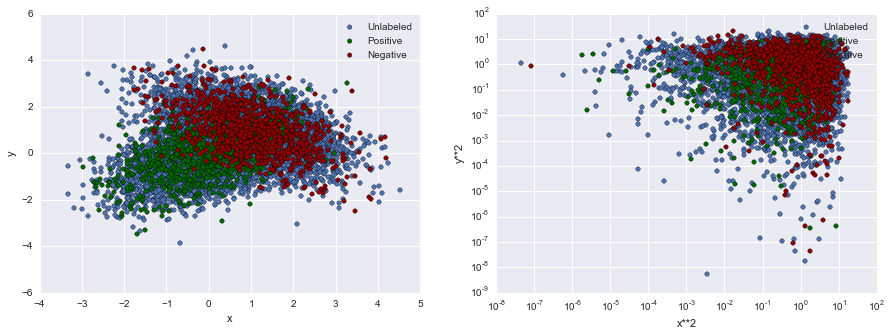

In [4]:
marker_limit = 20000
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# x vs y
df[df["label"]==0][:marker_limit].plot(kind="scatter", x="x", y="y", ax=ax1, legend=True, label="Unlabeled")
df[df["label"]==1][:marker_limit].plot(kind="scatter", x="x", y="y", c='darkgreen', ax=ax1, label="Positive")
df[df["label"]==-1][:marker_limit].plot(kind="scatter", x="x", y="y", c='darkred', ax=ax1, label="Negative")
# x^2 vs y^2
df[df["label"]==0][:marker_limit].plot(kind="scatter", x="x**2", y="y**2", ax=ax2, legend=True, label="Unlabeled",
                                      logx=True, logy=True)
df[df["label"]==1][:marker_limit].plot(kind="scatter", x="x**2", y="y**2", c='darkgreen', ax=ax2, label="Positive")
df[df["label"]==-1][:marker_limit].plot(kind="scatter", x="x**2", y="y**2", c='darkred', ax=ax2, label="Negative")

# Configuring the benchmark

The benchmark module clairvoya requires 3 dictionarys, general config, clasifiers to use and the grid search parameters for the classifiers. First we load clairvoya and then set up the dictionarys

In [5]:
import sys
sys.path.append("../../")  # trick to import clairvoya from internal notebook directory
import clairvoya.runbench

In [6]:
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble

import clairvoya.pulearning

config = {
    "data_file": data_file_name,
    "out_path": "output/pu2/", # TODO Disable
    "num_folds": 5,
    "test_size": 0.2,
    "pu_learning": True,
    "num_cores": 3,
    "verbosity": 0
}

svc_estimator = sklearn.svm.SVC(C=2.5, kernel='linear', class_weight='auto', probability=True)

classifiers = {
    'PosOnly(E&N2008)': clairvoya.pulearning.PosOnly(svc_estimator, hold_out_ratio=0.2, ),
    'SVM_DoubleWeight(E&N2008)': clairvoya.pulearning.SVMDoubleWeight(svc_estimator),
}

classifiers_gridparameters = { # Gridsearch off
    'PosOnly(E&N2008)': None,
    'SVM_DoubleWeight(E&N2008)': None,
}

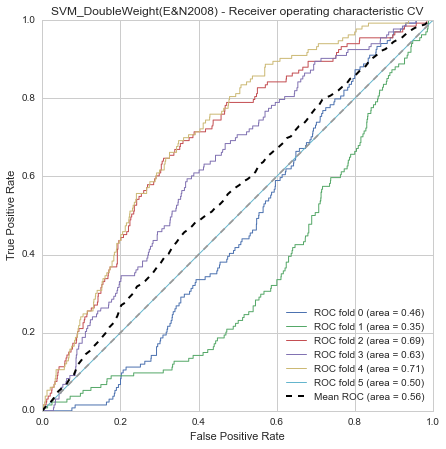

In [7]:
x = clairvoya.runbench.run_benchmark(config, classifiers, classifiers_gridparameters)